<a href="https://colab.research.google.com/github/AlexandreLarget/advanced_computer_vision/blob/main/03_ACV_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice

In [ ]:
!wget "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"

--2022-12-08 08:37:41--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png.1’

Lenna_(test_image). 100%[===================>] 462.73K  --.-KB/s    in 0.1s    

2022-12-08 08:37:42 (3.84 MB/s) - ‘Lenna_(test_image).png.1’ saved [473831/473831]



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from PIL import Image
img = Image.open("/content/Lenna_(test_image).png").convert("L")
img.save('lenn_grayscale.png')

In [ ]:
img = mpimg.imread("/content/lenn_grayscale.png")

In [ ]:
img.shape

(512, 512)

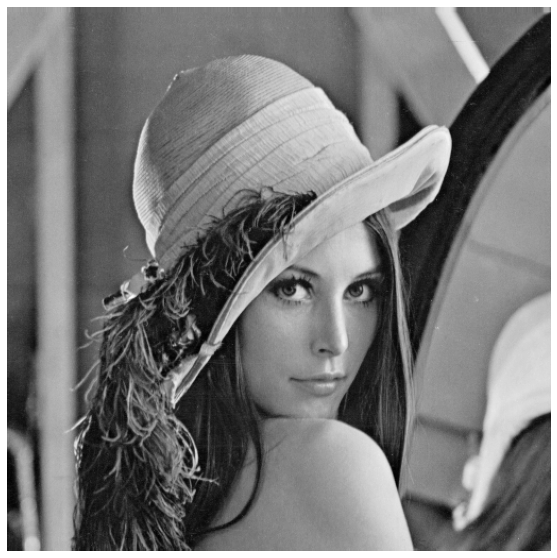

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap="gray")
plt.axis(False);

In [ ]:
import numpy as np
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1],
                   [-1, 1, 16, 1, -1],
                   [-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1]])

https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [ ]:
kernel

array([[-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1,  1, 16,  1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1]])

In [ ]:
img_width = img.shape[0]
img_height = img.shape[1]
kernel_width = 5
kernel_height = 5

output_height = img_height - kernel_height + 1
output_width = img_width - kernel_width + 1

In [ ]:
output_image = np.zeros((output_height, output_width))

for i in range(0, output_height):
  for j in range(0, output_width):
    for ii in range(0, kernel_height):
      for jj in range(0, kernel_width):
        output_image[i, j] += img[i + ii, j + jj] * kernel[ii, jj]


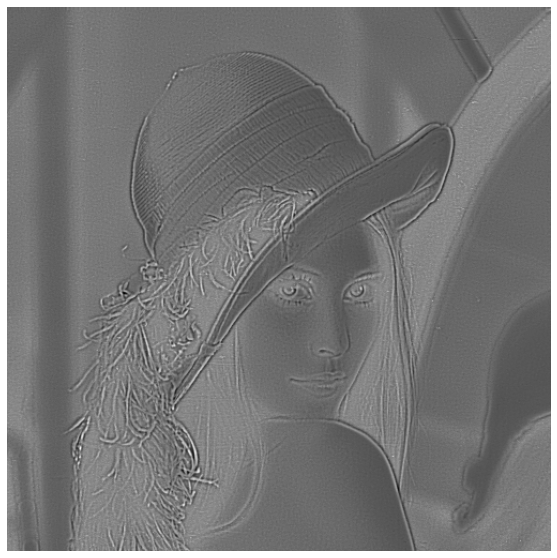

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(output_image, cmap="gray")
plt.axis(False);

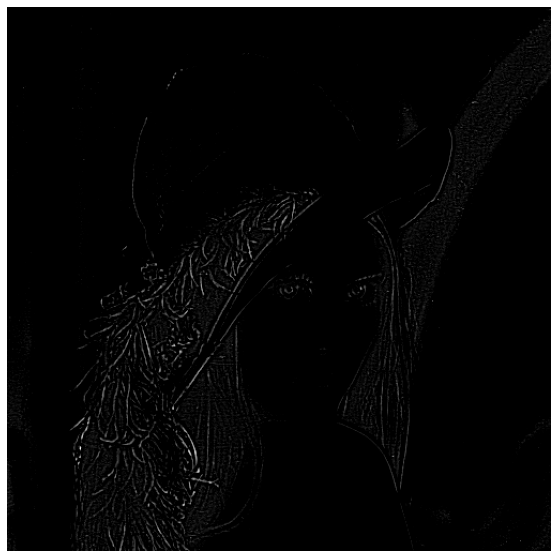

In [ ]:
biais = 1
relu_img = np.maximum(output_image + biais, 0)

plt.figure(figsize=(10, 10))
plt.imshow(relu_img, cmap="gray")
plt.axis(False);

In [ ]:
def make_convolution(img, kernel, iteration=1, biais=0):
  for i in range(iteration):
    img_width = img.shape[0] - 4
    img_height = img.shape[1] - 4
    kernel_width = 5
    kernel_height = 5

    output_height = img_height - kernel_height + 1
    output_width = img_width - kernel_width + 1

    output_image = np.zeros((output_height, output_width))

    for i in range(0, output_height):
      for j in range(0, output_width):
        for ii in range(0, kernel_height):
          for jj in range(0, kernel_width):
            output_image[i, j] += img[i + ii, j + jj] * kernel[ii, jj]
    
    relu_img = np.maximum(output_image + biais, 0)
    img = relu_img

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
    ax1.imshow(output_image, cmap="gray")
    ax1.set_title(output_image.shape)
    ax2.imshow(relu_img, cmap="gray");

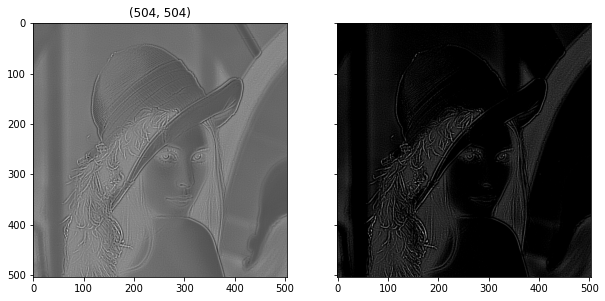

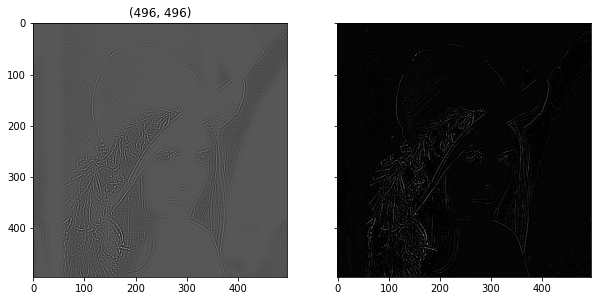

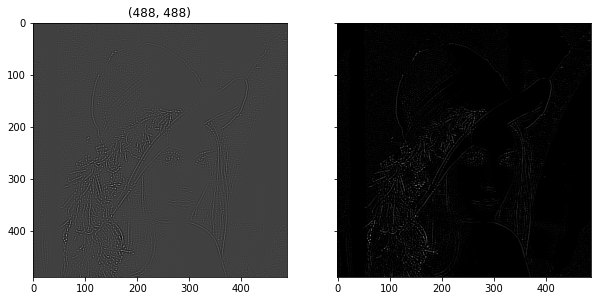

In [ ]:
make_convolution(img, kernel, 3, 2)

In [ ]:
import skimage.measure

def make_convolution_pooling(img, kernel, iteration=1, biais=0):
  for i in range(iteration):
    img_width = img.shape[0] - 4
    img_height = img.shape[1] - 4
    kernel_width = 5
    kernel_height = 5

    output_height = img_height - kernel_height + 1
    output_width = img_width - kernel_width + 1

    output_image = np.zeros((output_height, output_width))

    for i in range(0, output_height):
      for j in range(0, output_width):
        for ii in range(0, kernel_height):
          for jj in range(0, kernel_width):
            output_image[i, j] += img[i + ii, j + jj] * kernel[ii, jj]
    
    relu_img = np.maximum(output_image + biais, 0)
    img = relu_img

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
    ax1.imshow(output_image, cmap="gray")
    ax1.set_title(output_image.shape)
    ax2.imshow(relu_img, cmap="gray");

    img = skimage.measure.block_reduce(img, (2,2), np.max)

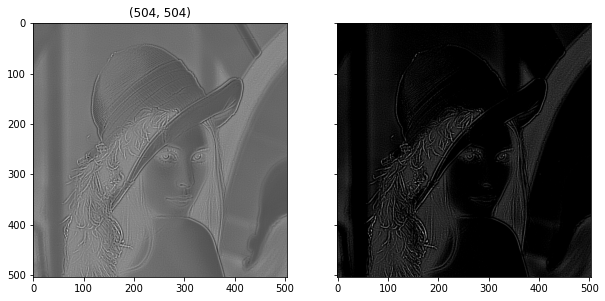

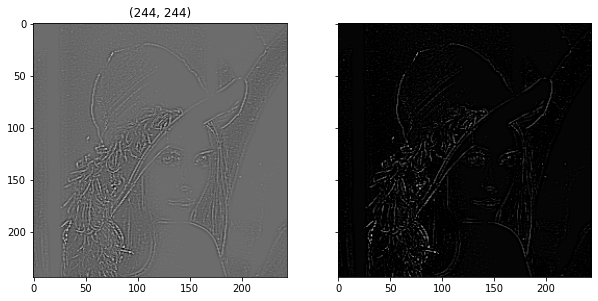

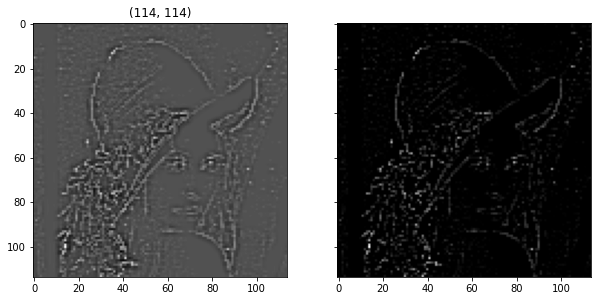

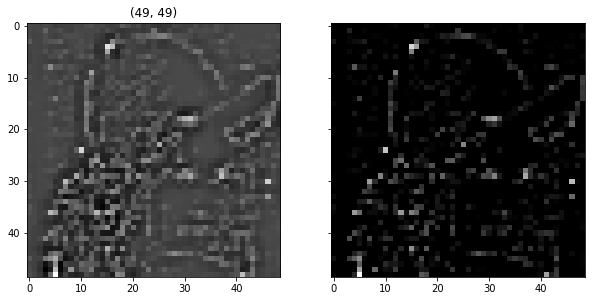

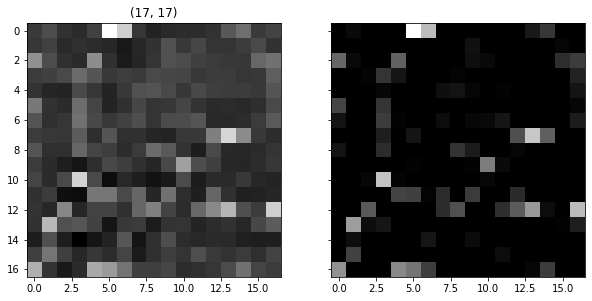

In [ ]:
make_convolution_pooling(img, kernel, 5, 2)

# Fashion MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = tf.expand_dims(x_train, -1)
x_test = tf.expand_dims(x_test, -1)

In [ ]:
x_train.shape

TensorShape([60000, 28, 28, 1])

In [ ]:
x_train[0].shape, x_train[0][0].shape

(TensorShape([28, 28, 1]), TensorShape([28, 1]))

In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
k = len(set(y_train))

In [ ]:
i = layers.Input(shape=(x_train[0].shape))
x = layers.Conv2D(32, kernel_size=(3,3), strides=2, activation="relu")(i)
x = layers.Conv2D(64, kernel_size=(3,3), strides=2, activation="relu")(x)
x = layers.Conv2D(128, kernel_size=(3,3), strides=2, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(k, activation="softmax")(x)

model = tf.keras.Model(i, x)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               6566

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [ ]:
r = model.fit(x_train, y_train, 
              validation_data=(x_test, y_test),
              epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5814 - accuracy: 0.7860 - val_loss: 0.4331 - val_accuracy: 0.8415
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4057 - accuracy: 0.8482 - val_loss: 0.3667 - val_accuracy: 0.8609
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3499 - accuracy: 0.8705 - val_loss: 0.3336 - val_accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3157 - accuracy: 0.8835 - val_loss: 0.3162 - val_accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2930 - accuracy: 0.8905 - val_loss: 0.2988 - val_accuracy: 0.8884
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2697 - accuracy: 0.8997 - val_loss: 0.2997 - val_accuracy: 0.8908
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2558 - accuracy: 0.9043 - val_loss: 0.2907 - val_accuracy

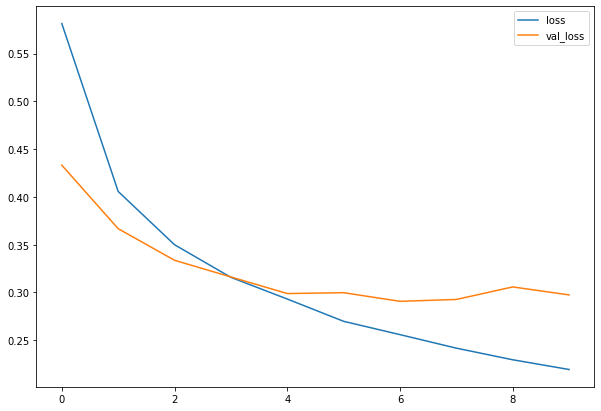

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

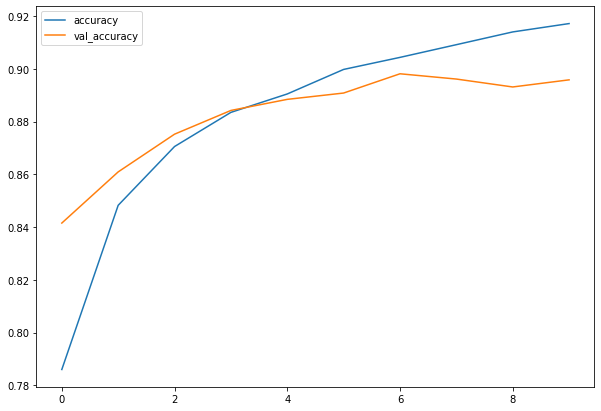

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


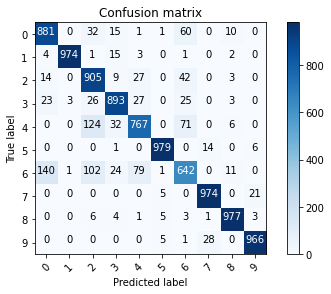

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')


  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

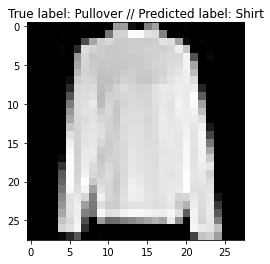

In [ ]:
miscallsed_ids = np.where(p_test != y_test)[0]
i = np.random.choice(miscallsed_ids)
plt.imshow(np.reshape(x_test[i], (28,28)), cmap="gray")
plt.title(f"True label: {labels[y_test[i]]} // Predicted label: {labels[p_test[i]]}");

# Cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000,))

In [ ]:
k = len(set(y_train))
k

10

In [ ]:
i = layers.Input(shape=(x_train[0].shape))
x = layers.Conv2D(32, kernel_size=(3,3), strides=2, activation="relu")(i)
x = layers.Conv2D(64, kernel_size=(3,3), strides=2, activation="relu")(x)
x = layers.Conv2D(128, kernel_size=(3,3), strides=2, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(k, activation="softmax")(x)

model = tf.keras.Model(i, x)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [ ]:
r = model.fit(x_train, y_train, 
              validation_data=(x_test, y_test),
              epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6167 - accuracy: 0.4080 - val_loss: 1.2948 - val_accuracy: 0.5366
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3019 - accuracy: 0.5316 - val_loss: 1.1596 - val_accuracy: 0.5845
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1709 - accuracy: 0.5826 - val_loss: 1.0969 - val_accuracy: 0.6096
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0716 - accuracy: 0.6202 - val_loss: 0.9955 - val_accuracy: 0.6478
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9929 - accuracy: 0.6466 - val_loss: 0.9692 - val_accuracy: 0.6603
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9355 - accuracy: 0.6704 - val_loss: 0.9332 - val_accuracy: 0.6750
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8829 - accuracy: 0.6880 - val_loss: 0.9140 - val_accuracy:

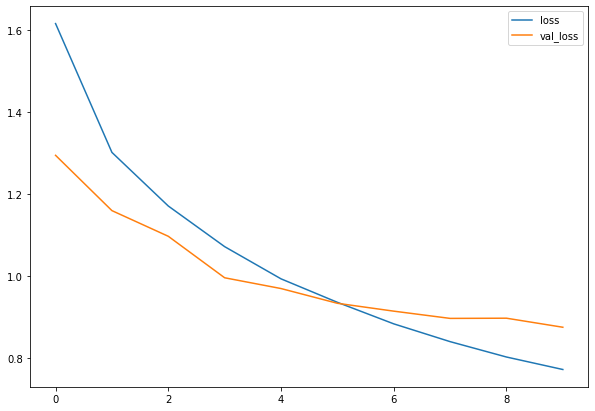

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

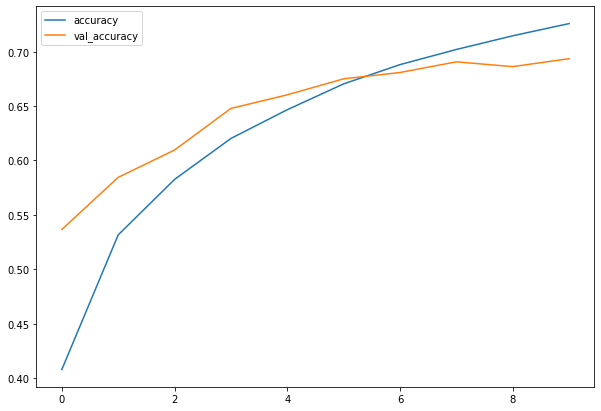

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


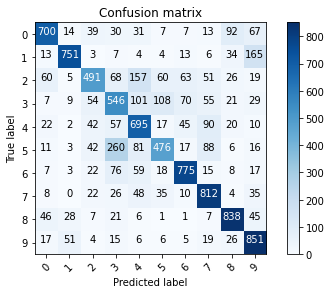

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

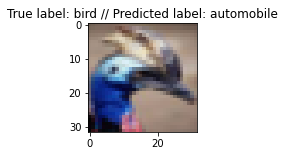

In [ ]:
miscallsed_ids = np.where(p_test != y_test)[0]
i = np.random.choice(miscallsed_ids)
plt.figure(figsize=(2,2))
plt.imshow(np.reshape(x_test[i], (32,32,3)), cmap="gray")
plt.title(f"True label: {labels[y_test[i]]} // Predicted label: {labels[p_test[i]]}");

# Data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_generator = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [ ]:
batch_size=32

In [ ]:
train_generator = data_generator.flow(x_train, y_train, batch_size=32)

In [ ]:
r = model.fit(train_generator,
              validation_data=(x_test, y_test),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=10)

Epoch 1/10
1562/1562 [==============================] - 29s 19ms/step - loss: 1.0426 - accuracy: 0.6315 - val_loss: 0.8635 - val_accuracy: 0.6962
Epoch 2/10
1562/1562 [==============================] - 29s 19ms/step - loss: 1.0330 - accuracy: 0.6376 - val_loss: 0.9242 - val_accuracy: 0.6780
Epoch 3/10
1562/1562 [==============================] - 31s 20ms/step - loss: 1.0150 - accuracy: 0.6417 - val_loss: 0.8975 - val_accuracy: 0.6843
Epoch 4/10
1562/1562 [==============================] - 29s 18ms/step - loss: 1.0054 - accuracy: 0.6468 - val_loss: 0.8586 - val_accuracy: 0.6971
Epoch 5/10
1562/1562 [==============================] - 29s 19ms/step - loss: 0.9930 - accuracy: 0.6498 - val_loss: 0.8829 - val_accuracy: 0.6910
Epoch 6/10
1562/1562 [==============================] - 29s 18ms/step - loss: 0.9808 - accuracy: 0.6557 - val_loss: 0.8493 - val_accuracy: 0.7042
Epoch 7/10
1562/1562 [==============================] - 29s 19ms/step - loss: 0.9674 - accuracy: 0.6586 - val_loss: 0.8210 -

# Cifar10 improved

In [ ]:
i = layers.Input(shape=(x_train[0].shape))
x = layers.Conv2D(32, kernel_size=(3,3), padding="same", activation="relu")(i)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, kernel_size=(3,3), padding="same", activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)
x = layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)
x = layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(k, activation="softmax")(x)

model = tf.keras.Model(i, x)

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0   

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [ ]:
r = model.fit(x_train, y_train,
              validation_data=(x_test, y_test),
              epochs=10)

Epoch 1/10
1563/1563 [==============================] - 61s 38ms/step - loss: 1.5183 - accuracy: 0.4536 - val_loss: 1.2647 - val_accuracy: 0.5430
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0382 - accuracy: 0.6370 - val_loss: 0.8439 - val_accuracy: 0.7025
Epoch 3/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8554 - accuracy: 0.7066 - val_loss: 0.7834 - val_accuracy: 0.7252
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7454 - accuracy: 0.7461 - val_loss: 0.7396 - val_accuracy: 0.7477
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6533 - accuracy: 0.7766 - val_loss: 0.7754 - val_accuracy: 0.7297
Epoch 6/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.5760 - accuracy: 0.8048 - val_loss: 0.7520 - val_accuracy: 0.7470
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5194 - accuracy: 0.8226 - val_loss: 0.5907 - val_

In [ ]:
rr = model.fit(train_generator,
               validation_data=(x_test, y_test),
               steps_per_epoch=x_train.shape[0] // batch_size,
               epochs=10) # 50,000 / 32 = 1563

Epoch 1/10
1562/1562 [==============================] - 44s 28ms/step - loss: 0.6588 - accuracy: 0.7827 - val_loss: 0.6486 - val_accuracy: 0.7889
Epoch 2/10
1562/1562 [==============================] - 41s 26ms/step - loss: 0.6073 - accuracy: 0.8024 - val_loss: 0.6153 - val_accuracy: 0.8032
Epoch 3/10
1562/1562 [==============================] - 33s 21ms/step - loss: 0.5714 - accuracy: 0.8088 - val_loss: 0.5446 - val_accuracy: 0.8176
Epoch 4/10
1562/1562 [==============================] - 32s 20ms/step - loss: 0.5531 - accuracy: 0.8168 - val_loss: 0.5715 - val_accuracy: 0.8073
Epoch 5/10
1562/1562 [==============================] - 32s 21ms/step - loss: 0.5233 - accuracy: 0.8254 - val_loss: 0.5467 - val_accuracy: 0.8175
Epoch 6/10
1562/1562 [==============================] - 32s 21ms/step - loss: 0.5067 - accuracy: 0.8294 - val_loss: 0.5109 - val_accuracy: 0.8269
Epoch 7/10
1562/1562 [==============================] - 33s 21ms/step - loss: 0.4991 - accuracy: 0.8323 - val_loss: 0.5153 -

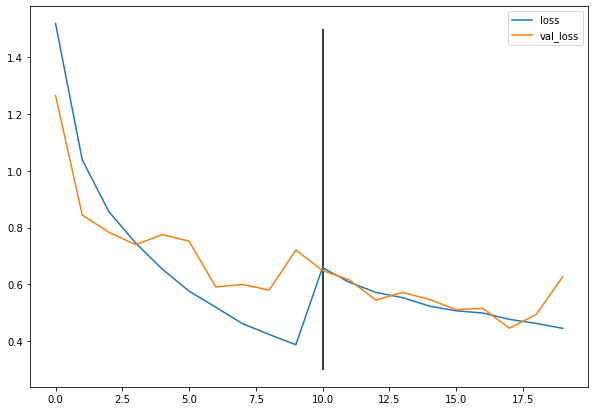

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(20), r.history["loss"] + rr.history["loss"], label="loss")
plt.plot(range(20), r.history["val_loss"] + rr.history["val_loss"], label="val_loss")
plt.vlines(10, ymin=0.3, ymax=1.5)
plt.legend();

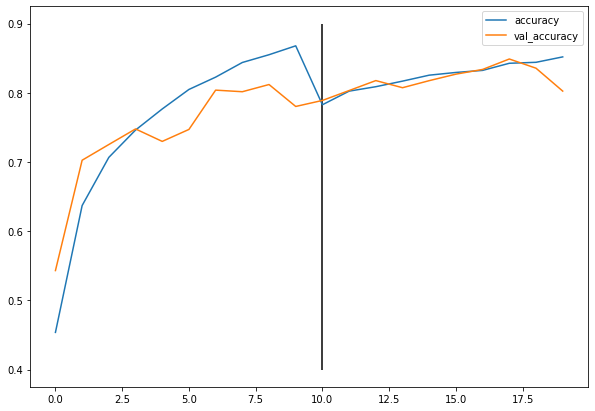

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(20), r.history["accuracy"] + rr.history["accuracy"], label="accuracy")
plt.plot(range(20), r.history["val_accuracy"] + rr.history["val_accuracy"], label="val_accuracy")
plt.vlines(10, ymin=0.4, ymax=0.9)
plt.legend();

# Exercice

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#!wget "https://lazyprogrammer.me/course_files/fer2013.csv"

--2022-12-09 04:18:23--  https://lazyprogrammer.me/course_files/fer2013.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2022-12-09 04:18:23 ERROR 403: Forbidden.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/fer2013.csv")

In [ ]:
data.shape

(35887, 3)

In [ ]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
set(data.Usage)

{'PrivateTest', 'PublicTest', 'Training'}

In [ ]:
training = data[data.Usage == "Training"]
testing = data[data.Usage == "PublicTest"]
training.shape

(28709, 3)

In [ ]:
x_train_ds = training.pixels.to_numpy()
y_train = training.emotion.values
x_test_ds = testing.pixels.to_numpy()
y_test = testing.emotion.values

In [ ]:
x_train = []

for i in range(len(x_train_ds)):
  x_train.append(list(map(int, x_train_ds[i].split(" "))))

In [ ]:
x_test = []

for i in range(len(x_test_ds)):
  x_test.append(list(map(int, x_test_ds[i].split(" "))))

In [ ]:
len(x_train), len(x_train[0])

(28709, 2304)

In [ ]:
x_train = np.reshape(x_train, (len(x_train), 48, 48))
x_test = np.reshape(x_test, (len(x_test), 48, 48))

In [ ]:
x_train.shape, x_test.shape

((28709, 48, 48), (3589, 48, 48))

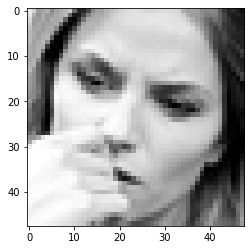

In [ ]:
plt.imshow(x_train[2], cmap="gray");

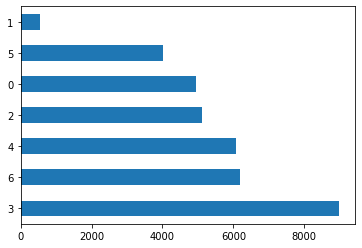

In [ ]:
data['emotion'].value_counts()[:20].plot(kind='barh')

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train = tf.expand_dims(x_train, -1)
x_test = tf.expand_dims(x_test, -1)

In [ ]:
k = len(set(y_train))
set(y_train)

{0, 1, 2, 3, 4, 5, 6}

In [ ]:
from tensorflow.keras import layers

In [ ]:
i = layers.Input(shape=(x_train[0].shape))
x = layers.Conv2D(32, kernel_size=(3,3), strides=1, activation="relu", padding="same")(i)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, kernel_size=(3,3), strides=2, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, kernel_size=(3,3), strides=1, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, kernel_size=(3,3), strides=2, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, kernel_size=(3,3), strides=1, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, kernel_size=(3,3), strides=2, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(k, activation="softmax")(x)

model = tf.keras.Model(i, x)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [ ]:
r = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=15)

Epoch 1/15
898/898 [==============================] - 8s 8ms/step - loss: 1.8611 - accuracy: 0.2383 - val_loss: 1.8621 - val_accuracy: 0.1934
Epoch 2/15
898/898 [==============================] - 7s 8ms/step - loss: 1.6005 - accuracy: 0.3547 - val_loss: 1.5298 - val_accuracy: 0.3773
Epoch 3/15
898/898 [==============================] - 7s 8ms/step - loss: 1.4191 - accuracy: 0.4479 - val_loss: 1.3937 - val_accuracy: 0.4533
Epoch 4/15
898/898 [==============================] - 7s 8ms/step - loss: 1.3188 - accuracy: 0.4946 - val_loss: 1.2833 - val_accuracy: 0.5052
Epoch 5/15
898/898 [==============================] - 8s 9ms/step - loss: 1.2505 - accuracy: 0.5258 - val_loss: 1.2188 - val_accuracy: 0.5361
Epoch 6/15
898/898 [==============================] - 10s 11ms/step - loss: 1.1923 - accuracy: 0.5472 - val_loss: 1.1916 - val_accuracy: 0.5467
Epoch 7/15
898/898 [==============================] - 7s 8ms/step - loss: 1.1335 - accuracy: 0.5706 - val_loss: 1.2332 - val_accuracy: 0.5311
Epoc

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_24 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 23, 23, 32)        9248      
                                                                 
 batch_normalization_25 (Bat  (None, 23, 23, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_26 (Conv2D)          (None, 23, 23, 64)        1849

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
generator = ImageDataGenerator(width_shift_range=0.2,
                               height_shift_range=0.2,
                               horizontal_flip=True)

In [ ]:
train_generator = generator.flow(x_train, y_train, batch_size=32)

In [ ]:
rr = model.fit(train_generator,
               validation_data=(x_test, y_test),
               steps_per_epoch=x_train.shape[0] // 32,
               epochs=15)

Epoch 1/15
897/897 [==============================] - 16s 18ms/step - loss: 1.2525 - accuracy: 0.5308 - val_loss: 1.0957 - val_accuracy: 0.5795
Epoch 2/15
897/897 [==============================] - 18s 20ms/step - loss: 1.2203 - accuracy: 0.5431 - val_loss: 1.1600 - val_accuracy: 0.5550
Epoch 3/15
897/897 [==============================] - 17s 19ms/step - loss: 1.1867 - accuracy: 0.5547 - val_loss: 1.0819 - val_accuracy: 0.5868
Epoch 4/15
897/897 [==============================] - 15s 17ms/step - loss: 1.1728 - accuracy: 0.5622 - val_loss: 1.1249 - val_accuracy: 0.5670
Epoch 5/15
897/897 [==============================] - 17s 19ms/step - loss: 1.1528 - accuracy: 0.5699 - val_loss: 1.0830 - val_accuracy: 0.5874
Epoch 6/15
897/897 [==============================] - 15s 17ms/step - loss: 1.1408 - accuracy: 0.5754 - val_loss: 1.1051 - val_accuracy: 0.5837
Epoch 7/15
897/897 [==============================] - 15s 17ms/step - loss: 1.1251 - accuracy: 0.5780 - val_loss: 1.1070 - val_accuracy:

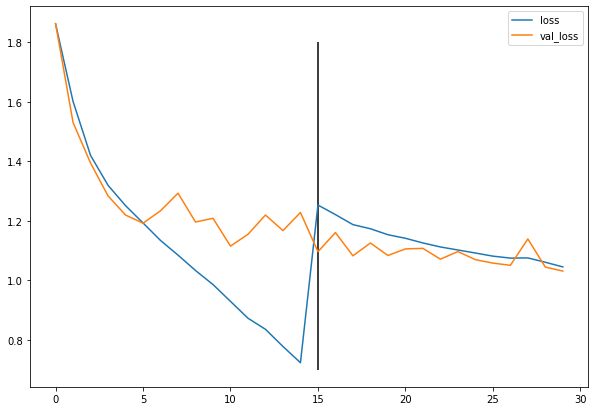

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(30), r.history["loss"] + rr.history["loss"], label="loss")
plt.plot(range(30), r.history["val_loss"] + rr.history["val_loss"], label="val_loss")
plt.vlines(15, ymin=0.7, ymax=1.8)
plt.legend();

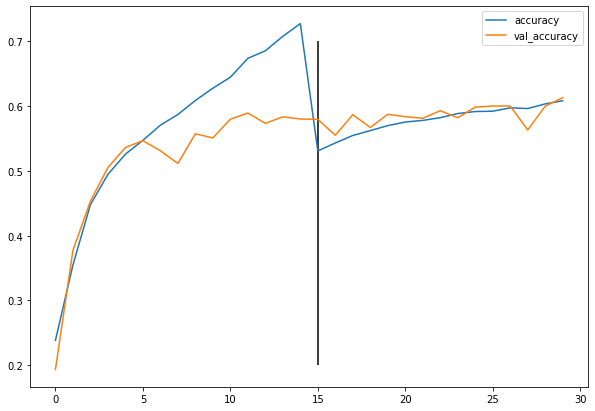

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(30), r.history["accuracy"] + rr.history["accuracy"], label="accuracy")
plt.plot(range(30), r.history["val_accuracy"] + rr.history["val_accuracy"], label="val_accuracy")
plt.vlines(15, ymin=0.2, ymax=0.7)
plt.legend();

In [ ]:
rrr = model.fit(train_generator,
          validation_data=(x_test, y_test),
          epochs=15,
          steps_per_epoch=x_train.shape[0] // 32,
          callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=2, verbose=2)])

Epoch 1/15
897/897 [==============================] - 16s 18ms/step - loss: 1.0348 - accuracy: 0.6139 - val_loss: 1.0676 - val_accuracy: 0.5999 - lr: 0.0010
Epoch 2/15
897/897 [==============================] - 15s 17ms/step - loss: 1.0334 - accuracy: 0.6121 - val_loss: 0.9982 - val_accuracy: 0.6264 - lr: 0.0010
Epoch 3/15
897/897 [==============================] - 15s 17ms/step - loss: 1.0171 - accuracy: 0.6209 - val_loss: 1.0425 - val_accuracy: 0.6055 - lr: 0.0010
Epoch 4/15
897/897 [==============================] - ETA: 0s - loss: 1.0146 - accuracy: 0.6249
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
897/897 [==============================] - 16s 18ms/step - loss: 1.0146 - accuracy: 0.6249 - val_loss: 1.0151 - val_accuracy: 0.6197 - lr: 0.0010
Epoch 5/15
897/897 [==============================] - 15s 17ms/step - loss: 0.9816 - accuracy: 0.6321 - val_loss: 0.9832 - val_accuracy: 0.6278 - lr: 1.0000e-04
Epoch 6/15
897/897 [=============================

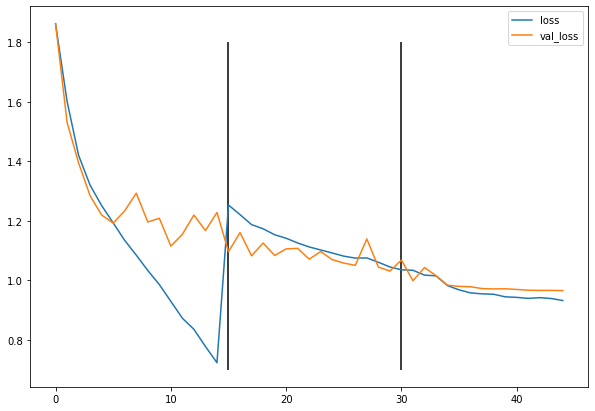

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(45), r.history["loss"] + rr.history["loss"] + rrr.history["loss"], label="loss")
plt.plot(range(45), r.history["val_loss"] + rr.history["val_loss"] + rrr.history["val_loss"], label="val_loss")
plt.vlines(15, ymin=0.7, ymax=1.8)
plt.vlines(30, ymin=0.7, ymax=1.8)

plt.legend();